Задача 1: Подберите скорость обучения (alpha) и количество итераций.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# сгенерируем 2 признака и 100 объектов
n_features = 2
n_objects = 100

# сгенерируем вектор истинных весов
w_true = np.random.normal(size = (1, n_features))

# сгенерируем матрицу X, вычислим Y с добавлением случайного шума
X = np.vstack((np.ones(n_objects), np.random.uniform(-10, 10, size = (1, n_objects))))
Y = (w_true.dot(X)).flatten() + np.random.normal(0, 0.5, size = (n_objects, ))

In [3]:
# реализуем функцию для определения среднеквадратичной ошибки
def mserror(X, w, y_pred):
    y = w.dot(X)
    return (sum((y - y_pred)**2))/X.shape[1]

Реализуем функцию, вычисляющую вектор весов по нормальному уравнению линейной регрессии, и применим ее.

In [4]:
def normal_equation(X, y):
    return np.linalg.inv(np.dot(X, X.T)) @ X @ y

normal_eq_w = normal_equation(X, Y)
normal_eq_w.shape
print(f'В случае использования нормального уравнения функционал ошибки составляет {mserror(X, normal_eq_w, Y)}')
print(f'Максимально приближенные веса {normal_eq_w}')

В случае использования нормального уравнения функционал ошибки составляет 0.21444538646050582
Максимально приближенные веса [-0.56842468 -0.36370756]


In [5]:
n = X.shape[1]
alpha = 1e-2
w = np.array([1, 0.5])

for i in range(500):
    y_pred = np.dot(w, X)
    err = mserror(X, w, Y)
    for ii in range(w.shape[0]):
        w[ii] -= alpha * (1/n * 2 * np.sum(X[ii] * (y_pred - Y)))
    if i % 10 == 0:
        print(i, w, err)

0 [ 0.9589608  -0.05795779] 27.52840793611699
10 [ 0.67714644 -0.38670801] 1.8130204986465759
20 [ 0.45144821 -0.382555  ] 1.2861825546657968
30 [ 0.26664686 -0.37913984] 0.93297315575304
40 [ 0.11533158 -0.3763435 ] 0.6961699832747237
50 [-0.00856532 -0.37405387] 0.5374093651586527
60 [-0.11001204 -0.37217911] 0.4309710366480622
70 [-0.19307659 -0.37064406] 0.35961128817539284
80 [-0.2610898  -0.36938716] 0.31176937095122303
90 [-0.316779   -0.36835802] 0.2796945795923253
100 [-0.36237729 -0.36751535] 0.25819058685105856
110 [-0.39971316 -0.36682538] 0.24377360441016827
120 [-0.43028375 -0.36626043] 0.23410798625256593
130 [-0.45531494 -0.36579785] 0.22762783863834643
140 [-0.47581046 -0.36541909] 0.22328333501557077
150 [-0.49259219 -0.36510896] 0.22037063721114186
160 [-0.50633307 -0.36485502] 0.21841786901561114
170 [-0.51758409 -0.3646471 ] 0.21710866913236934
180 [-0.52679643 -0.36447686] 0.2162309385659853
190 [-0.53433948 -0.36433746] 0.215642479189364
200 [-0.54051573 -0.36422

In [6]:
# функция для определения градиентного спуска
def gradient_descent(alpha, iterations, w, X=X, Y=Y):
    n = X.shape[1]
    err = np.inf
    for i in range(iterations):
        y_pred = np.dot(w, X)
        err_new = mserror(X, w, Y)
        if err_new < err:
            err = err_new
            for j in range(w.shape[0]):
                w[j] -= alpha * (1/n * 2 * np.sum(X[j] * (y_pred - Y))) 
        else:
            return i-1, w, err
    return i, w, err

In [7]:
# подбор оптимальных параметров
min_err = np.inf
min_coef = ()

for alpha in [1e-1, 1e-2, 1e-3, 1e-4]:
    for iters in [1e3, 1e4, 1e5, 1e6]:
        w = np.array([1, 0.5])
        num, wi, err = gradient_descent(alpha, int(iters), w)
        print(f'Альфа = {alpha}, количество итераций = {iters}. Ошибка: {err}. Веса: {wi}')
        if err < min_err:
            min_err = err
            min_coef = (alpha, iters)

print(f'Минимальная ошибка {min_err} достигается при коэффициентах {min_coef}')

Альфа = 0.1, количество итераций = 1000.0. Ошибка: 27.52840793611699. Веса: [ 0.58960801 -5.07957788]
Альфа = 0.1, количество итераций = 10000.0. Ошибка: 27.52840793611699. Веса: [ 0.58960801 -5.07957788]
Альфа = 0.1, количество итераций = 100000.0. Ошибка: 27.52840793611699. Веса: [ 0.58960801 -5.07957788]
Альфа = 0.1, количество итераций = 1000000.0. Ошибка: 27.52840793611699. Веса: [ 0.58960801 -5.07957788]
Альфа = 0.01, количество итераций = 1000.0. Ошибка: 0.2144453864605099. Веса: [-0.56842461 -0.36370756]
Альфа = 0.01, количество итераций = 10000.0. Ошибка: 0.2144453864605099. Веса: [-0.56842461 -0.36370756]
Альфа = 0.01, количество итераций = 100000.0. Ошибка: 0.2144453864605099. Веса: [-0.56842461 -0.36370756]
Альфа = 0.01, количество итераций = 1000000.0. Ошибка: 0.2144453864605099. Веса: [-0.56842461 -0.36370756]
Альфа = 0.001, количество итераций = 1000.0. Ошибка: 0.25996407418110906. Веса: [-0.35442232 -0.36766236]
Альфа = 0.001, количество итераций = 10000.0. Ошибка: 0.21

In [8]:
w_list = [w.copy()]
errors = []
alpha = 0.01
max_iter = 1e4
min_weight_dist = 1e-8
weight_dist = np.inf
n = X.shape[1]
w = np.zeros(n_features)
i = 0
while weight_dist > min_weight_dist and i < max_iter:
    y_pred = np.dot(w, X)
    # new_w = w - alpha * (1/n * 2 * np.sum(X * (y_pred - Y), axis=1))
    new_w = w - alpha * 1/n * 2 * np.dot(X, (y_pred - Y))
    weight_dist = np.linalg.norm(new_w - w, ord=2)
    
    w_list.append(new_w.copy())
    errors.append(mserror(X, new_w, Y))
    
    i += 1
    w = new_w

w_list = np.array(w_list)
print(f'Итераций = {i}, Подобранные веса = {w}, Ошибка = {round(errors[-1], 4)}')

Итераций = 698, Подобранные веса = [-0.56842419 -0.36370757], Ошибка = 0.2144


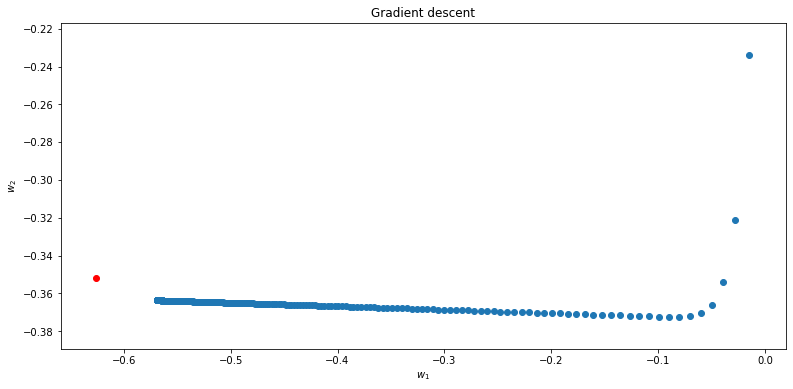

In [9]:
# график изменения весов w
plt.figure(figsize=(13, 6))
plt.title('Gradient descent')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')

plt.scatter(w_list[:, 0], w_list[:, 1])
plt.scatter(w_true[0, 0], w_true[0, 1], c='r')
#plt.plot(w_list[:, 0], w_list[:, 1])

plt.show()

Text(0, 0.5, 'MSE')

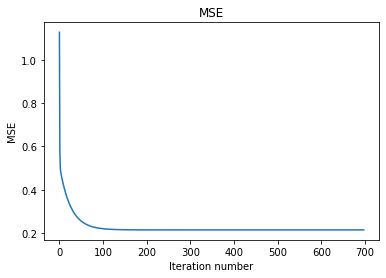

In [10]:
# построим график изменения функционала ошибки от количества итераций
plt.plot(range(len(errors)), errors)
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

Задача 2 (опция): В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее:

Для того, чтобы исключить итерацию по весам, вводится матричное умножение. Ошибка заключалась в суммировании всех элементов матрицы и последующей выдаче скаляра, который затем расширился до вектора с одинаковыми элементами.

Есть два способа исправить ошибку:
1. Дополнить параметром axis=1
2. Вместо np.sum использовать np.dot

In [11]:
n = X.shape[1]
alpha = 1e-2
w = np.array([1, 0.5])

for i in range(1000):
    y_pred = np.dot(w, X)
    err = mserror(X, w, Y)
    # for ii in range(w.shape[0]):
    #     w[ii] -= alpha * (1/n * 2 * np.sum(X[ii] * (y_pred - Y)))
    w -= (alpha * (1/n * 2 * np.sum(X * (y_pred - Y), axis=1)))
    # w -= (alpha * (1/n * 2 * np.dot(X, (y_pred - Y))))
    if i % 100 == 0:
        print(i, w, err)

0 [ 0.9589608  -0.05795779] 27.52840793611699
100 [-0.36237729 -0.36751535] 0.25819058685105856
200 [-0.54051573 -0.36422332] 0.21524795671151542
300 [-0.56464443 -0.36377742] 0.21446011079602265
400 [-0.56791265 -0.36371702] 0.2144456566001679
500 [-0.56835532 -0.36370884] 0.21444539141661653
600 [-0.56841528 -0.36370773] 0.214445386551433
700 [-0.5684234  -0.36370758] 0.21444538646217395
800 [-0.5684245  -0.36370756] 0.21444538646053635
900 [-0.56842465 -0.36370756] 0.21444538646050632


In [12]:
n = X.shape[1]
alpha = 1e-2
w = np.array([1, 0.5])

for i in range(1000):
    y_pred = np.dot(w, X)
    err = mserror(X, w, Y)
    # for ii in range(w.shape[0]):
    #     w[ii] -= alpha * (1/n * 2 * np.sum(X[ii] * (y_pred - Y)))
    # w -= (alpha * (1/n * 2 * np.sum(X * (y_pred - Y), axis=1)))
    w -= (alpha * (1/n * 2 * np.dot(X, (y_pred - Y))))
    if i % 100 == 0:
        print(i, w, err)

0 [ 0.9589608  -0.05795779] 27.52840793611699
100 [-0.36237729 -0.36751535] 0.25819058685105856
200 [-0.54051573 -0.36422332] 0.21524795671151542
300 [-0.56464443 -0.36377742] 0.21446011079602265
400 [-0.56791265 -0.36371702] 0.2144456566001679
500 [-0.56835532 -0.36370884] 0.21444539141661653
600 [-0.56841528 -0.36370773] 0.214445386551433
700 [-0.5684234  -0.36370758] 0.21444538646217395
800 [-0.5684245  -0.36370756] 0.21444538646053635
900 [-0.56842465 -0.36370756] 0.21444538646050632
